In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread
from PIL import Image

# BOX FILTER

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

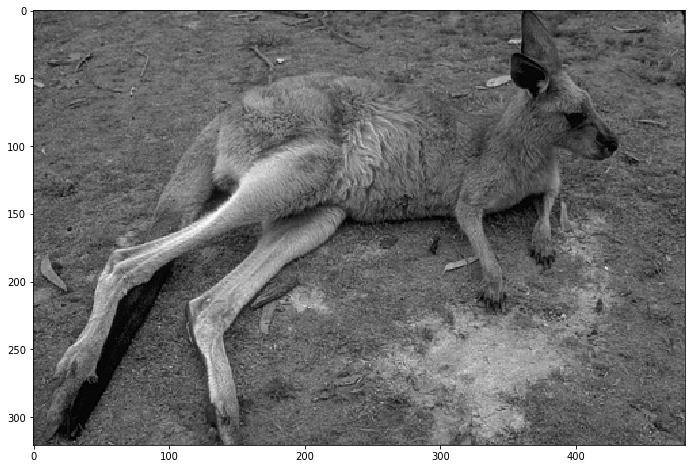

In [3]:
image = cv2.imread('kangaroo.pgm')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(image)

In [4]:
kernel = np.ones((3, 3), np.float32) / 9
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

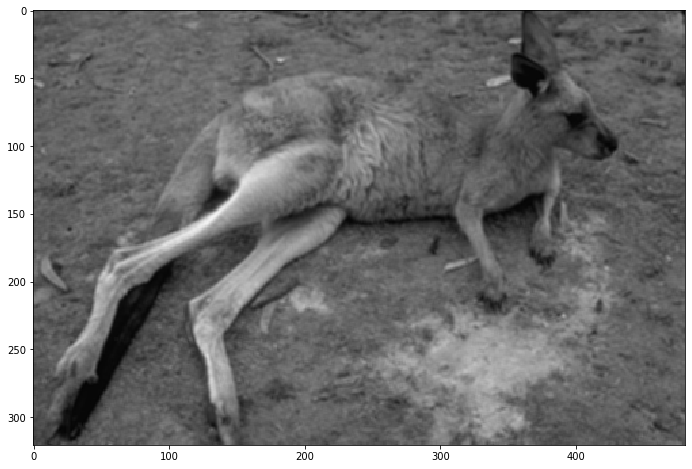

In [5]:
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img)

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [7]:
def formula(GKernel1D, size, sigma):
    for i in range(size):
        # calculating density
        GKernel1D[i] = 1 / (np.sqrt(2 * np.pi) * sigma) * np.e ** (-np.power((GKernel1D[i] - 0) / sigma, 2) / 2)
    return GKernel1D

In [8]:
def gaussian_kernel(size, sigma, verbose=False):

    GKernel1D = np.linspace(-(size // 2), size // 2, size)
    formula(GKernel1D,size,sigma)
        
    # creating the outer product and normalizing it to make sure the center value is always 1
    GKernel2D = np.outer(GKernel1D.T, GKernel1D.T)
    GKernel2D *= 1.0 / GKernel2D.max()
    return GKernel2D

In [9]:
def convolution(image, kernel, verbose=False):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()
    
    # Padding image if image size is smaller than kernel size
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
    output = np.zeros(image.shape)
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
    
    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            output[row, col] /= kernel.shape[0] * kernel.shape[1]
 
    #print("Output Image size : {}".format(output.shape))
 
    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}x{} Kernel".format(kernel_row, kernel_col))
        plt.show()
 
    return output

In [10]:
def GausianBlur(image, kernel_size, sigma, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma)
    return convolution(image, kernel, verbose=verbose)

In [11]:
# image = cv2.imread('kangaroo.pgm')
# plt.imshow(image)
# plt.title("Input Image")
# plt.show()

In [12]:
# output_image = GausianBlur(image, 11, 10) # image, kernel size, sigma

In [13]:
# plt.imshow(output_image, cmap='gray')
# plt.title("Output Image")
# plt.show()

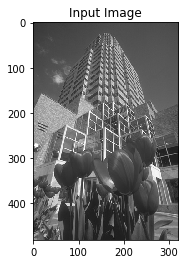

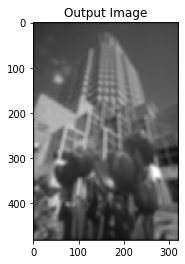

In [14]:
image = cv2.imread('red.pgm')
plt.imshow(image)
plt.title("Input Image")
plt.show()
output_image = GausianBlur(image, 11, 5) # image, kernel size, sigma
plt.imshow(output_image, cmap='gray')
plt.title("Output Image")
plt.show()

In [15]:
def SobelEdgeDetection(image, filter, verbose=False):
    #horizontal output
    new_image_x = convolution(image, filter, verbose)
    if verbose:
        plt.imshow(new_image_x, cmap='gray')
        plt.title("Horizontal Edge")
        plt.show()
 
    new_image_y = convolution(image, np.flip(filter.T, axis=0), verbose)
     #vertical output
    if verbose:
        plt.imshow(new_image_y, cmap='gray')
        plt.title("Vertical Edge")
        plt.show()
     #gradient magnitute
    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))
 
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
    theta = np.arctan2(new_image_y, new_image_x)
    if verbose:
        plt.imshow(gradient_magnitude, cmap='gray')
        plt.title("Gradient Magnitude")
        plt.show()
 
    return (gradient_magnitude,theta)

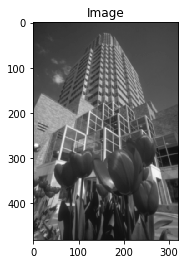

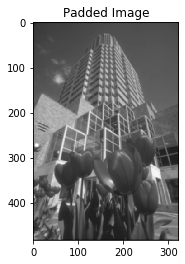

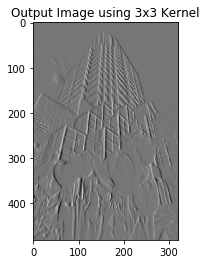

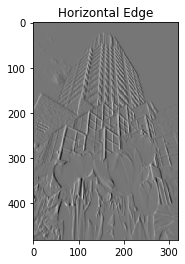

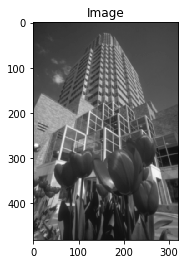

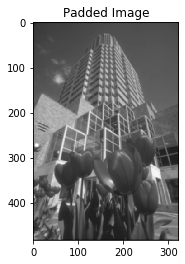

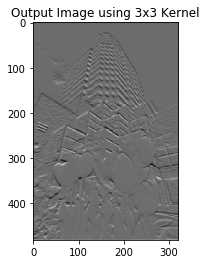

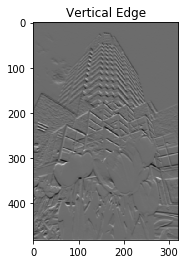

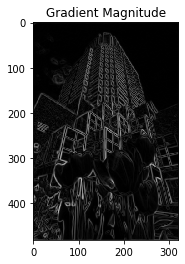

In [16]:
image = cv2.imread('red.pgm')
image = GausianBlur(image, 9, 1, verbose=False)
#sobel_filter matrix
filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
output_image,theta = SobelEdgeDetection(image, filter, verbose=True)

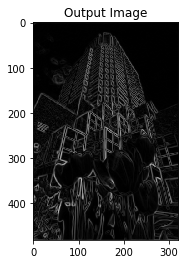

In [17]:
plt.imshow(output_image, cmap='gray')
plt.title("Output Image")
plt.show()

In [18]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [19]:
img_nms = non_max_suppression(output_image, theta)

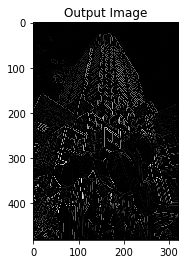

In [20]:
plt.imshow(img_nms, cmap='gray')
plt.title("Output Image")
plt.show()

In [21]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

In [22]:
img_thresh, weak, strong = threshold(img_nms, lowThresholdRatio=0.07, highThresholdRatio=0.19)


In [23]:
def hysteresis(img, weak, strong=255):
    
    M, N = img.shape  
    
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    
    return img

In [24]:
img_final = hysteresis(img_thresh, weak, strong=strong)

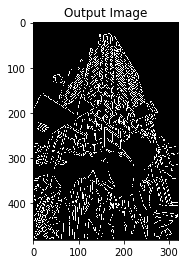

In [25]:
plt.imshow(img_final, cmap='gray')
plt.title("Output Image")
plt.show()